In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [15]:
pollution_meteo = pd.read_csv("output/pollution_meteo_clean.csv")
pollution_meteo["timestamp"] = pd.to_datetime(pollution_meteo["timestamp"])

pollution_meteo.info()
pollution_meteo.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027828 entries, 0 to 1027827
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   station_id         1027828 non-null  object        
 1   timestamp          1027828 non-null  datetime64[ns]
 2   pollutant          1027828 non-null  object        
 3   value              1027828 non-null  float64       
 4   unit               1027828 non-null  object        
 5   station_name       1027828 non-null  object        
 6   city               1027828 non-null  object        
 7   lat                1027828 non-null  float64       
 8   lon                1027828 non-null  float64       
 9   station_type       1027828 non-null  object        
 10  temperature_c      907309 non-null   float64       
 11  humidity_pct       907309 non-null   float64       
 12  wind_speed_kmh     907309 non-null   float64       
 13  precipitation_mm   907309 n

,station_id,timestamp,pollutant,value,unit,station_name,city,lat,lon,station_type,temperature_c,humidity_pct,wind_speed_kmh,precipitation_mm,weather_condition
0,ST0001,2024-01-01 00:00:00,O3,88.30,ug/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,2.8,57.4,49.4,0.8,pluvieux
1,ST0001,2024-01-01 02:00:00,PM10,47.08,ug/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,-0.9,45.4,42.3,0.0,pluvieux
2,ST0001,2024-01-01 05:00:00,CO,0.48,mg/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,NaN,NaN,NaN,NaN,NaN
3,ST0001,2024-01-01 07:00:00,CO,0.90,mg/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,10.6,94.1,15.8,0.0,nuageux
4,ST0001,2024-01-01 08:00:00,CO,1.58,mg/m3,Paris-urbaine-1,Paris,48.809101,2.329703,urbaine,6.6,73.7,18.7,3.5,pluvieux


In [16]:
# Calculer les statistiques descriptives par polluant et par ville.
# Columns : value, temperature_c, humidity_pct, wind_speed_kmh, precipitation_mm
column = "value"
df_summary1 = pollution_meteo.groupby(["pollutant", "city"]).agg(
    count_=(column, "count"),
    mean_=(column, "mean"),
    std_=(column, "std"),
    min_=(column, "min"),
    Q1_=(column, lambda x: x.quantile(0.25)),
    Q2_=(column, "median"),
    Q3_=(column, lambda x: x.quantile(0.75)),
    max_=(column, "max"),
)
df_summary1.head(60)

count_      mean_       std_   min_      Q1_     Q2_  \
pollutant city                                                               
CO        Bordeaux     10791   0.785422   0.371357   0.14   0.5000   0.730   
          Grenoble     21880   0.762690   0.403775   0.09   0.4600   0.680   
          Lille        18218   0.768736   0.419646   0.09   0.4500   0.680   
          Lyon         10933   0.784744   0.372728   0.14   0.4900   0.730   
          Marseille    25629   0.754110   0.394342   0.09   0.4600   0.680   
          Nantes       14596   0.851544   0.413383   0.14   0.5400   0.780   
          Paris        10958   0.786142   0.372487   0.14   0.5000   0.720   
          Rouen        25480   0.750933   0.393742   0.08   0.4500   0.680   
          Strasbourg   14511   0.856017   0.415535   0.14   0.5400   0.780   
          Toulouse     18314   0.770824   0.423522   0.08   0.4500   0.690   
NO2       Bordeaux     10963  47.054623  22.037586   8.45  29.9600  43.660   
          Grenoble     21785  45.497406  24.136853   5.26  27.3800  40.860   
          Lille        18263  46.056443  25.192709   5.11  27.1200  41.090   
          Lyon         10934  47.201162  22.346833   8.71  30.0100  43.640   
          Marseille    25479  45.204514  23.463861   5.50  27.4600  40.960   
          Nantes       14520  51.038594  24.703512   8.42  32.0200  46.840   
          Paris        10980  47.212621  22.235383   8.49  30.0100  43.595   
          Rouen        25407  45.284340  23.650620   5.74  27.3300  40.560   
          Strasbourg   14516  51.411742  25.307741   8.95  32.2075  46.860   
          Toulouse     18300  46.118869  25.133223   5.50  27.0500  41.115   
O3        Bordeaux     10846  78.062389  36.707591  14.11  49.6150  71.830   
          Grenoble     21767  76.254817  40.579313   8.52  45.6400  68.040   
          Lille        18206  77.109952  42.122177   8.67  45.6525  68.630   
          Lyon         10931  78.219067  37.107453  14.17  49.3150  72.640   
          Marseille    25608  75.363383  39.588786   9.01  45.4100  67.970   
          Nantes       14573  85.521814  41.865683  14.26  53.5300  78.130   
          Paris        10949  78.061179  36.595074  14.20  50.0600  71.870   
          Rouen        25486  75.170341  39.327283   9.09  45.8600  67.565   
          Strasbourg   14504  85.629202  41.768234  14.22  54.0800  78.405   
          Toulouse     18332  76.836904  42.182779   8.60  45.1875  67.945   
PM10      Bordeaux     10981  39.065891  18.323021   7.29  25.0900  35.980   
          Grenoble     21794  37.908226  20.071552   4.25  22.7525  34.000   
          Lille        18262  38.565250  20.976695   4.22  22.7625  34.495   
          Lyon         10904  39.045264  18.490898   7.08  24.9075  36.105   
          Marseille    25631  37.649686  19.590473   4.41  22.9500  33.880   
          Nantes       14583  42.739207  20.824952   7.31  26.9900  39.000   
          Paris        10973  39.077728  18.379982   7.10  25.0400  36.130   
          Rouen        25485  37.713461  19.689624   4.50  22.8300  34.010   
          Strasbourg   14470  42.699389  20.809015   7.20  26.8000  39.080   
          Toulouse     18224  38.321116  20.819934   4.46  22.4900  34.120   
PM2.5     Bordeaux     10975  23.539333  11.001863   4.26  15.1300  21.760   
          Grenoble     21723  22.733310  12.032873   2.75  13.5950  20.360   
          Lille        18153  23.128206  12.632957   2.59  13.5500  20.630   
          Lyon         10926  23.453572  11.039383   4.26  15.1100  21.560   
          Marseille    25547  22.530361  11.838697   2.57  13.5800  20.240   
          Nantes       14669  25.850169  12.655240   4.23  16.2500  23.600   
          Paris        10938  23.502124  10.972905   4.42  15.1100  21.830   
          Rouen        25494  22.665835  11.919861   2.52  13.6800  20.390   
          Strasbourg   14591  25.662698  12.534526   4.21  16.1400  23.410   
          Toulouse     18220  23.101458  12.

In [17]:
# Identifier les jours de dépassement des seuils réglementaires.
# | Polluant | Seuil information (ug/m3) | Seuil alerte (ug/m3) |
# |----------|---------------------------|----------------------|
# | PM2.5    | 25                        | 50                   |
# | PM10     | 50                        | 80                   |
# | NO2      | 200                       | 400                  |
# | O3       | 180                       | 240                  |
# | SO2      | 300                       | 500                  |

query_alert = '(pollutant == "PM2.5" and value > 50) or (pollutant == "PM10" and value > 80) or (pollutant == "NO2" and value > 400) or (pollutant == "O3" and value > 240) or (pollutant == "SO2" and value > 500)'
df_alert = pollution_meteo.query(query_alert)

print("Nombre de jour en alerte : ", df_alert.size)
df_alert.head(5)

Nombre de jour en alerte :  211755


,station_id,timestamp,pollutant,value,unit,station_name,city,lat,lon,station_type,temperature_c,humidity_pct,wind_speed_kmh,precipitation_mm,weather_condition
63,ST0004,2024-01-01 08:00:00,PM2.5,50.51,ug/m3,Lyon-urbaine-1,Lyon,45.773049,4.788878,urbaine,12.2,44.3,14.5,0.0,neigeux
69,ST0004,2024-01-01 17:00:00,PM2.5,50.05,ug/m3,Lyon-urbaine-1,Lyon,45.773049,4.788878,urbaine,0.6,60.7,38.5,0.0,ensoleille
98,ST0006,2024-01-01 12:00:00,PM10,83.53,ug/m3,Lyon-industrielle-3,Lyon,45.774202,4.841825,industrielle,7.4,40.6,22.8,0.0,neigeux
149,ST0009,2024-01-01 11:00:00,PM10,84.90,ug/m3,Marseille-industrielle-3,Marseille,43.322381,5.335766,industrielle,3.5,54.8,43.1,0.0,neigeux
157,ST0010,2024-01-01 08:00:00,PM2.5,56.90,ug/m3,Marseille-trafic-4,Marseille,43.288761,5.347587,trafic,8.7,68.4,0.4,0.0,brumeux


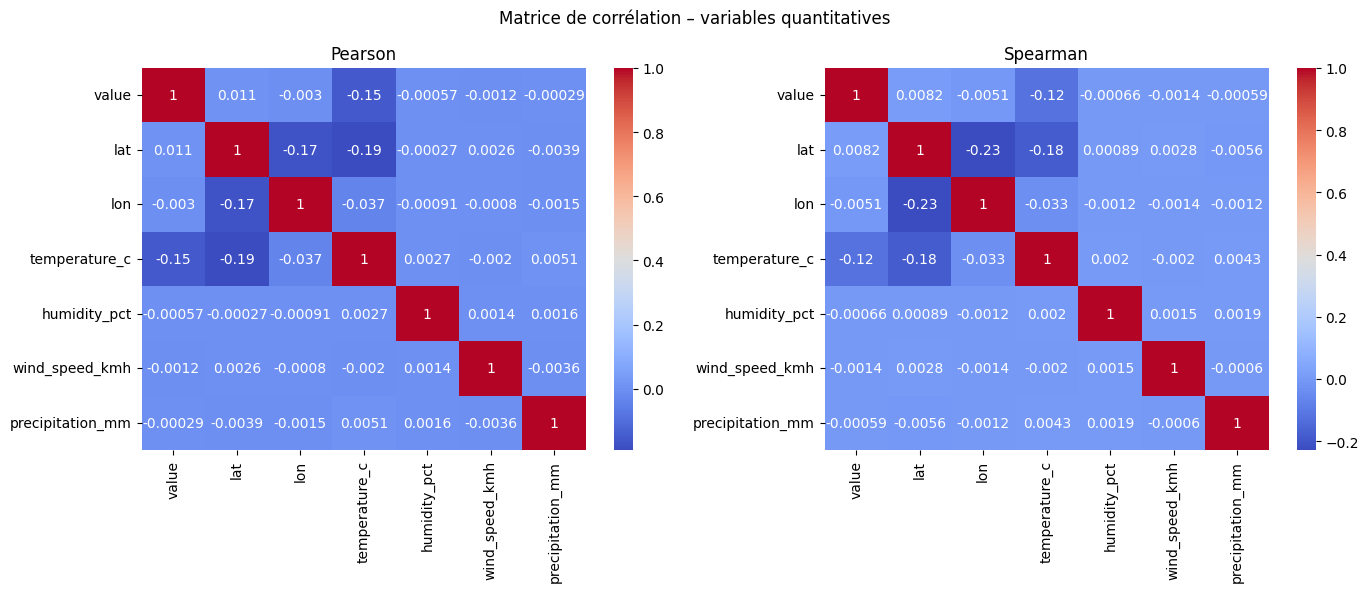

In [18]:
# Calculer la matrice de corrélation entre polluants et variables météo.
# Variables quantitatives : "value", "lat", "lon", "temperature_c", "humidity_pct", "wind_speed_kmh", "precipitation_mm"
df_corr_pearson = pollution_meteo[["value", "lat", "lon", "temperature_c", "humidity_pct", "wind_speed_kmh", "precipitation_mm"]].corr(method="pearson")
df_corr_spearman = pollution_meteo[["value", "lat", "lon", "temperature_c", "humidity_pct", "wind_speed_kmh", "precipitation_mm"]].corr(method="spearman")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Matrice de corrélation – variables quantitatives")
sns.heatmap(df_corr_pearson, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title("Pearson")
sns.heatmap(df_corr_spearman, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title("Spearman")
plt.tight_layout()

# => Pas de correlation linéaire entre variables quantitatives.

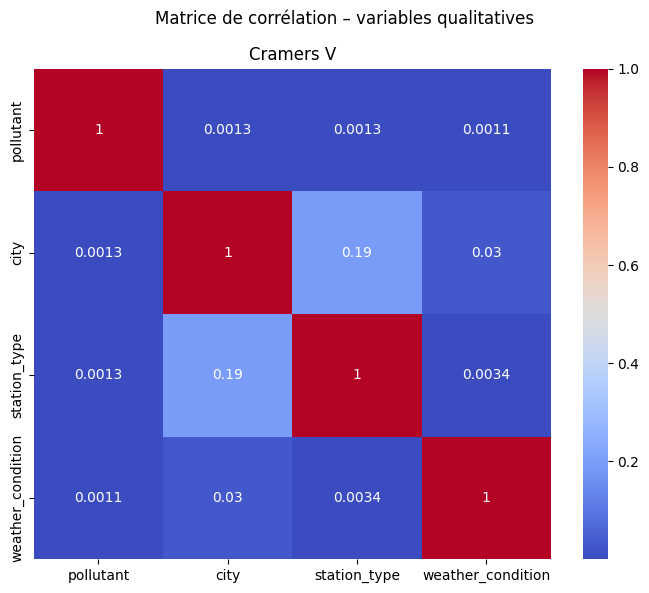

In [19]:
# Variables qualitatives : "pollutant", "city", "station_type", "weather_condition"
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

vars = ["pollutant", "city", "station_type", "weather_condition"]
mat_corr = np.zeros((len(vars), len(vars)))
for i in range(len(vars)):
    for j in range(len(vars)):
        mat_corr[i,j] = cramers_v(pollution_meteo[vars[i]], pollution_meteo[vars[j]])

df_corr = pd.DataFrame(mat_corr)

plt.figure(figsize=(7, 6))
plt.suptitle("Matrice de corrélation – variables qualitatives")
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("Cramers V")
plt.xticks(np.arange(len(vars)) + 0.5 * np.ones(len(vars)), labels=vars)
plt.yticks(np.arange(len(vars)) + 0.5 * np.ones(len(vars)), labels=vars)
plt.tight_layout()

# => Pas de corrélation entre variables qualitatives

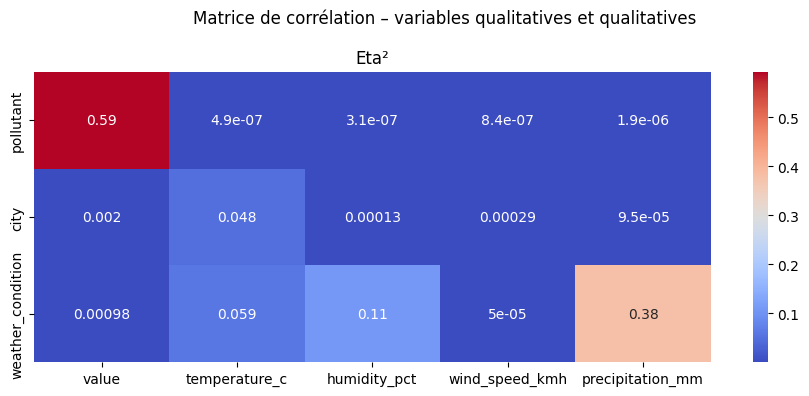

In [27]:
# Variables qualitatives et quantitatives

def correlation_ratio(categories, values):
    categories = pd.Categorical(categories)
    means = values.groupby(categories, observed=False).mean()
    n = values.groupby(categories, observed=False).count()
    total_mean = values.mean()
    numerator = sum(n * (means - total_mean) ** 2)
    denominator = sum((values - total_mean) ** 2)
    return numerator / denominator

vars_qualitatives = ["pollutant", "city", "weather_condition"]
var_quantitatives = ["value", "temperature_c", "humidity_pct", "wind_speed_kmh", "precipitation_mm"]

df_clean = pollution_meteo.dropna()

mat_corr_quali_quanti = np.zeros((len(vars_qualitatives), len(var_quantitatives)))
for i in range(len(vars_qualitatives)):
    for j in range(len(var_quantitatives)):
        mat_corr_quali_quanti[i,j] = correlation_ratio(df_clean[vars_qualitatives[i]], df_clean[var_quantitatives[j]])

df_corr_quali_quanti = pd.DataFrame(mat_corr_quali_quanti)

plt.figure(figsize=(9, 4))
plt.suptitle("Matrice de corrélation – variables qualitatives et qualitatives")
sns.heatmap(df_corr_quali_quanti, annot=True, cmap='coolwarm')
plt.title("Eta²")
plt.xticks(np.arange(len(var_quantitatives)) + 0.5 * np.ones(len(var_quantitatives)), labels=var_quantitatives)
plt.yticks(np.arange(len(vars_qualitatives)) + 0.5 * np.ones(len(vars_qualitatives)), labels=vars_qualitatives)
plt.tight_layout()

# => Forte corrélation entre weather_condition et precipitation_mm 0.38 >> 0.14
# => Corrélation moyenne entre weather_condition et humidity_pct 0.06 < 0.11 < 0.14
# => Forte corrélation entre pollutant et value 0.59 >> 0.14


In [21]:
# Analyser la saisonnalité (pollution par mois, jour de semaine, heure).
df_times_truncate = pollution_meteo.copy()
df_times_truncate['month'] = df_times_truncate['timestamp'].dt.month
df_times_truncate['day_of_week'] = df_times_truncate['timestamp'].dt.day_of_week
df_times_truncate['hour'] = df_times_truncate['timestamp'].dt.hour

# Group : "month", "day_of_week", "hour"
# Columns : value, temperature_c, humidity_pct, wind_speed_kmh, precipitation_mm
group = "month"
column = "value"
df_summary2 = df_times_truncate.groupby(group).agg(
    count_=(column, "count"),
    mean_=(column, "mean"),
    std_=(column, "std"),
    min_=(column, "min"),
    Q1_=(column, lambda x: x.quantile(0.25)),
    Q2_=(column, "median"),
    Q3_=(column, lambda x: x.quantile(0.75)),
    max_=(column, "max"),
)
df_summary2.head(5)

,count_,mean_,std_,min_,Q1_,Q2_,Q3_,max_
month,,,,,,,,
1,174880,41.589105,41.173567,0.15,8.93,31.17,61.60,272.85
2,164195,41.560168,41.140631,0.15,8.95,31.23,61.42,272.74
3,175214,29.688171,29.414608,0.11,6.41,22.17,43.92,194.64
4,169732,29.651594,29.357702,0.11,6.38,22.25,43.87,194.95
5,175319,29.663844,29.376142,0.11,6.37,22.26,43.84,194.76


In [22]:
# Identifier les top 10 journées les plus polluées.
df_times_truncate['date'] = df_times_truncate['timestamp'].dt.date

# Columns : value, temperature_c, humidity_pct, wind_speed_kmh, precipitation_mm
df_summary2 = df_times_truncate.groupby("date").agg(
    max_value=("value", "max"),
).sort_values("max_value", ascending=False)
df_summary2.head(10)

,max_value
date,
2024-01-02,272.85
2024-02-05,272.74
2024-02-21,272.73
2024-01-20,272.54
2024-01-10,272.52
2024-01-25,272.50
2024-01-24,272.36
2024-02-01,272.24
2024-02-14,272.20
